In [1]:
# imports
import numpy as np
import pandas as pd
import operator
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Data Preprocessing

In [2]:
# read in data
foodie = pd.read_csv('2020-XTern-DS.csv')
foodie.head()

,Restaurant,Latitude,Longitude,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time
0,ID_6321,39.262605,-85.837372,"Fast Food, Rolls, Burger, Salad, Wraps",$20.00,$50.00,3.5,12,4,30 minutes
1,ID_2882,39.775933,-85.740581,"Ice Cream, Desserts",$10.00,$50.00,3.5,11,4,30 minutes
2,ID_1595,39.253436,-85.123779,"Italian, Street Food, Fast Food",$15.00,$50.00,3.6,99,30,65 minutes
3,ID_5929,39.029841,-85.332050,"Mughlai, North Indian, Chinese",$25.00,$99.00,3.7,176,95,30 minutes
4,ID_6123,39.882284,-85.517407,"Cafe, Beverages",$20.00,$99.00,3.2,521,235,65 minutes


In [3]:
# show datatypes
foodie.dtypes

Restaurant        object
Latitude         float64
Longitude        float64
Cuisines          object
Average_Cost      object
Minimum_Order     object
Rating            object
Votes             object
Reviews           object
Cook_Time         object
dtype: object

In [4]:
# remove $ and minutes from respective columns
foodie.Average_Cost = foodie.Average_Cost.replace('[\$,]', '', regex=True).astype(float)
foodie.Minimum_Order = foodie.Minimum_Order.replace('[\$,]', '', regex=True).astype(float)
foodie.Cook_Time = foodie.Cook_Time.replace(' minutes', '', regex=True).astype(float)
foodie.head()

,Restaurant,Latitude,Longitude,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time
0,ID_6321,39.262605,-85.837372,"Fast Food, Rolls, Burger, Salad, Wraps",20.0,50.0,3.5,12,4,30.0
1,ID_2882,39.775933,-85.740581,"Ice Cream, Desserts",10.0,50.0,3.5,11,4,30.0
2,ID_1595,39.253436,-85.123779,"Italian, Street Food, Fast Food",15.0,50.0,3.6,99,30,65.0
3,ID_5929,39.029841,-85.332050,"Mughlai, North Indian, Chinese",25.0,99.0,3.7,176,95,30.0
4,ID_6123,39.882284,-85.517407,"Cafe, Beverages",20.0,99.0,3.2,521,235,65.0


In [5]:
# show datatypes
foodie.dtypes

Restaurant        object
Latitude         float64
Longitude        float64
Cuisines          object
Average_Cost     float64
Minimum_Order    float64
Rating            object
Votes             object
Reviews           object
Cook_Time        float64
dtype: object

In [6]:
# show unique values for votes
foodie.Rating.sort_values().unique()

array(['-', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3.0', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4.0', '4.1',
       '4.2', '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', 'NEW',
       'Opening Soon'], dtype=object)

In [7]:
# show unique values for votes
foodie.Votes.sort_values().unique()

array(['-', '10', '100', '1000', '1008', '101', '1016', '102', '1028',
       '103', '104', '105', '1057', '106', '107', '1072', '108', '109',
       '1094', '1097', '11', '110', '1102', '1104', '1105', '111', '1112',
       '1114', '1118', '112', '113', '114', '1141', '1155', '116', '1169',
       '1177', '118', '119', '12', '120', '121', '1210', '123', '1233',
       '124', '125', '1256', '126', '1261', '1262', '1265', '127', '1270',
       '1276', '128', '129', '1291', '1298', '13', '130', '1307', '1319',
       '132', '133', '1332', '134', '1349', '1372', '138', '139', '1392',
       '1398', '14', '140', '1408', '141', '142', '143', '1434', '144',
       '1444', '145', '1450', '146', '147', '1473', '148', '149', '15',
       '150', '1502', '1504', '1507', '1512', '152', '153', '154', '1545',
       '155', '1552', '157', '158', '159', '16', '160', '1608', '161',
       '163', '164', '166', '1665', '167', '168', '169', '1693', '17',
       '170', '171', '1719', '172', '173', '1731', 

In [8]:
# show unique values for reviews
foodie.Reviews.sort_values().unique()

array(['-', '1', '10', '100', '101', '102', '103', '104', '105', '106',
       '1062', '107', '108', '109', '1095', '11', '110', '111', '112',
       '113', '1131', '1133', '114', '115', '1150', '116', '117', '1174',
       '118', '119', '12', '120', '121', '1211', '123', '1235', '1239',
       '124', '125', '126', '1260', '127', '1276', '128', '129', '13',
       '1306', '131', '132', '133', '1336', '1356', '136', '1369', '137',
       '138', '139', '14', '141', '1415', '142', '143', '1443', '145',
       '1457', '147', '148', '15', '152', '153', '154', '155', '157',
       '158', '1581', '159', '16', '160', '1603', '163', '1631', '164',
       '165', '1660', '167', '1673', '168', '169', '17', '170', '171',
       '172', '173', '174', '175', '176', '177', '178', '179', '18',
       '181', '183', '184', '1845', '187', '188', '189', '19', '191',
       '193', '1948', '196', '1962', '199', '2', '20', '201', '202',
       '204', '205', '206', '207', '208', '21', '210', '214', '215', '22',

In [9]:
# As seen in cell 6, Rating needs -, NEW and Opening Soon filtered out
# As seen in cell 7, Votes needs - filtered out
# As seen in cell 8, Reviews needs - filtered out
foodie.Rating = foodie.Rating.replace('-', '0', regex=True)
foodie.Rating = foodie.Rating.replace('NEW', '0', regex=True)
foodie.Rating = foodie.Rating.replace('Opening Soon', '0', regex=True)
foodie.Votes = foodie.Votes.replace('-', '0', regex=True)
foodie.Reviews = foodie.Reviews.replace('-', '0', regex=True)

foodie.Rating = foodie.Rating.astype('float')
foodie.Votes = foodie.Votes.astype('float')
foodie.Reviews = foodie.Reviews.astype('float')

foodie.head()

,Restaurant,Latitude,Longitude,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time
0,ID_6321,39.262605,-85.837372,"Fast Food, Rolls, Burger, Salad, Wraps",20.0,50.0,3.5,12.0,4.0,30.0
1,ID_2882,39.775933,-85.740581,"Ice Cream, Desserts",10.0,50.0,3.5,11.0,4.0,30.0
2,ID_1595,39.253436,-85.123779,"Italian, Street Food, Fast Food",15.0,50.0,3.6,99.0,30.0,65.0
3,ID_5929,39.029841,-85.332050,"Mughlai, North Indian, Chinese",25.0,99.0,3.7,176.0,95.0,30.0
4,ID_6123,39.882284,-85.517407,"Cafe, Beverages",20.0,99.0,3.2,521.0,235.0,65.0


In [10]:
# Split apart the cuisines for each value and combine. Cuisines column removed
separated_cuisines = foodie.Cuisines.str.split(',', expand=True).stack()
cuisine_columns = pd.get_dummies(separated_cuisines).groupby(level=0).sum()
foodie = pd.concat([foodie,cuisine_columns],sort=False,axis=1)
foodie = foodie.drop('Cuisines',axis=1)
foodie.head()

,Restaurant,Latitude,Longitude,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time,Afghan,...,Salad,Sandwich,Seafood,South Indian,Street Food,Tamil,Tea,Thai,Tibetan,Wraps
0,ID_6321,39.262605,-85.837372,20.0,50.0,3.5,12.0,4.0,30.0,0,...,0,0,0,0,0,0,0,0,0,0
1,ID_2882,39.775933,-85.740581,10.0,50.0,3.5,11.0,4.0,30.0,0,...,0,0,0,0,0,0,0,0,0,0
2,ID_1595,39.253436,-85.123779,15.0,50.0,3.6,99.0,30.0,65.0,0,...,0,0,0,0,0,0,0,0,0,0
3,ID_5929,39.029841,-85.332050,25.0,99.0,3.7,176.0,95.0,30.0,0,...,0,0,0,0,0,0,0,0,0,0
4,ID_6123,39.882284,-85.517407,20.0,99.0,3.2,521.0,235.0,65.0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# set index to restaurant ids
foodie = foodie.set_index('Restaurant')
foodie.head()

,Latitude,Longitude,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time,Afghan,American,...,Salad,Sandwich,Seafood,South Indian,Street Food,Tamil,Tea,Thai,Tibetan,Wraps
Restaurant,,,,,,,,,,,,,,,,,,,,,
ID_6321,39.262605,-85.837372,20.0,50.0,3.5,12.0,4.0,30.0,0,0,...,0,0,0,0,0,0,0,0,0,0
ID_2882,39.775933,-85.740581,10.0,50.0,3.5,11.0,4.0,30.0,0,0,...,0,0,0,0,0,0,0,0,0,0
ID_1595,39.253436,-85.123779,15.0,50.0,3.6,99.0,30.0,65.0,0,0,...,0,0,0,0,0,0,0,0,0,0
ID_5929,39.029841,-85.332050,25.0,99.0,3.7,176.0,95.0,30.0,0,0,...,0,0,0,0,0,0,0,0,0,0
ID_6123,39.882284,-85.517407,20.0,99.0,3.2,521.0,235.0,65.0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Data Analysis

## Finding Best Asian Food

In [12]:
# adding popularity metric
foodie['Popularity_Asian'] = foodie.Votes*foodie.Asian*foodie.Rating

In [13]:
# show values of popularity with largest value first
foodie.Popularity_Asian.sort_values(ascending=False)

Restaurant
ID_7678    6932.2
ID_1631    6186.6
ID_1631    6186.6
ID_1160    4295.8
ID_2386    2142.0
            ...  
ID_1119       0.0
ID_3667       0.0
ID_5205       0.0
ID_7856       0.0
ID_6321       0.0
Name: Popularity_Asian, Length: 2019, dtype: float64

### Conclusion 1
Restaurant ID_7678 is the most popular Asian restaurant based off of popularity (product of the rating and number of votes), then ID_1631 (which has two entries), ID_1160 and ID_2386.

## Predicting Cook Time with Various ML Methods

In [14]:
# see min and max cost values
min_cost = foodie.Average_Cost.min()
max_cost = foodie.Average_Cost.max()
print('minimum avg cost = ',min_cost)
print('maximum avg cost = ',max_cost)

minimum avg cost =  5.0
maximum avg cost =  150.0


In [15]:
# split Average_Cost into 3 equally filled bins
foodie.Average_Cost = pd.qcut(foodie.Average_Cost,q=3,labels=['Cheap','Reasonable','Expensive'])
foodie.head()

,Latitude,Longitude,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time,Afghan,American,...,Sandwich,Seafood,South Indian,Street Food,Tamil,Tea,Thai,Tibetan,Wraps,Popularity_Asian
Restaurant,,,,,,,,,,,,,,,,,,,,,
ID_6321,39.262605,-85.837372,Reasonable,50.0,3.5,12.0,4.0,30.0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
ID_2882,39.775933,-85.740581,Cheap,50.0,3.5,11.0,4.0,30.0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
ID_1595,39.253436,-85.123779,Cheap,50.0,3.6,99.0,30.0,65.0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
ID_5929,39.029841,-85.332050,Expensive,99.0,3.7,176.0,95.0,30.0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
ID_6123,39.882284,-85.517407,Reasonable,99.0,3.2,521.0,235.0,65.0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [18]:
# separate features and targets for comparing models using grid search cross validation
features = foodie.drop('Average_Cost',axis=1)
target = foodie.Average_Cost

In [32]:
# standardize grid search feature set
features = (features - features.mean()) / features.std()
pd.DataFrame(features).fillna(0)

,Latitude,Longitude,Minimum_Order,Rating,Votes,Reviews,Cook_Time,Afghan,American,Andhra,...,Sandwich,Seafood,South Indian,Street Food,Tamil,Tea,Thai,Tibetan,Wraps,Popularity_Asian
Restaurant,,,,,,,,,,,,,,,,,,,,,
ID_6321,-0.827713,-1.149738,-0.164522,0.366409,-0.377787,-0.325213,-0.586372,-0.031481,-0.080482,-0.049814,...,-0.073996,-0.049814,-0.264419,-0.165733,-0.031481,-0.049814,-0.031481,-0.049814,-0.049814,-0.054333
ID_2882,0.968652,-0.816429,-0.164522,0.366409,-0.379726,-0.325213,-0.586372,-0.031481,-0.080482,-0.049814,...,-0.073996,-0.049814,-0.264419,-0.165733,-0.031481,-0.049814,-0.031481,-0.049814,-0.049814,-0.054333
ID_1595,-0.859800,1.307581,-0.164522,0.436637,-0.209100,-0.238215,2.378636,-0.031481,-0.080482,-0.049814,...,-0.073996,-0.049814,-0.264419,-0.165733,-0.031481,-0.049814,-0.031481,-0.049814,-0.049814,-0.054333
ID_5929,-1.642261,0.590382,2.247501,0.506864,-0.059802,-0.020720,-0.586372,-0.031481,-0.080482,-0.049814,...,-0.073996,-0.049814,-0.264419,-0.165733,-0.031481,-0.049814,-0.031481,-0.049814,-0.049814,-0.054333
ID_6123,1.340823,-0.047910,2.247501,0.155725,0.609129,0.447732,2.378636,-0.031481,-0.080482,-0.049814,...,-0.073996,-0.049814,-0.264419,-0.165733,-0.031481,-0.049814,-0.031481,-0.049814,-0.049814,-0.054333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID_4366,0.440394,1.082258,-2.625770,-2.091563,-0.401054,-0.338597,-0.586372,-0.031481,-0.080482,-0.049814,...,-0.073996,-0.049814,-0.264419,-0.165733,-0.031481,-0.049814,-0.031481,-0.049814,-0.049814,-0.054333
ID_319,-1.278743,0.001632,2.247501,0.787775,-0.172260,-0.034104,-0.586372,-0.031481,-0.080482,-0.049814,...,-0.073996,-0.049814,-0.264419,-0.165733,-0.031481,-0.049814,-0.031481,-0.049814,-0.049814,-0.054333
ID_3104,0.573405,-1.540658,-0.164522,-2.091563,-0.401054,-0.338597,-0.586372,-0.031481,-0.080482,-0.049814,...,-0.073996,-0.049814,-0.264419,-0.165733,-0.031481,-0.049814,-0.031481,-0.049814,-0.049814,-0.054333


In [33]:
# after testing a depth of 1-30 and 500, 1000, 1250, 1500 and 2000 estimators, 
# the grid was reduced to save time when running again. It still took around 2-3 minutes to complete

# Random forest grid search cross-validation
rfgrid = {'max_depth':np.arange(20,30),'n_estimators':[500,1000,1500]}

rf = RandomForestClassifier(random_state=0)
rfCV = GridSearchCV(rf,param_grid=rfgrid,n_jobs=-1,)
rfCV.fit(features,target)
print('best parameters',rfCV.best_params_)
print('best accuracy rate',rfCV.best_score_.round(2))

best parameters {'max_depth': 22, 'n_estimators': 1000}
best accuracy rate 0.65


In [34]:
# Decision tree grid search cross-validation
grid = {'max_depth':np.arange(1,20)}

tree = DecisionTreeClassifier(random_state=0)
treeCV = GridSearchCV(tree,param_grid=grid,return_train_score=True)
treeCV.fit(features,target)
print('best tree depth',treeCV.best_params_)
print('best test accuracy rate',treeCV.best_score_.round(2))

best tree depth {'max_depth': 5}
best test accuracy rate 0.6


In [35]:
# KNN grid search cross-validation
knngrid = {'n_neighbors':np.arange(1,200)}

knn = KNeighborsClassifier()
knnCV = GridSearchCV(knn,param_grid=knngrid,n_jobs=-1)
knnCV.fit(features,target)
print('best parameters',knnCV.best_params_)
print('best accuracy rate',knnCV.best_score_.round(2))

best parameters {'n_neighbors': 25}
best accuracy rate 0.6


### Conclusion 2
In my research, the best classifier I could come up with to classify restaurants as cheap, reasonable and expensive was a Random Forests classifier with a max depth of 22 and 1000 estimators. This achieved an accuracy of 0.65.

# Relationship between Rating and Average Cost

(2, 5)

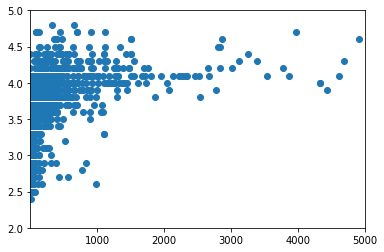

In [37]:
# plotting Rating vs. Votes
plt.scatter(x=foodie.Votes,y=foodie.Rating)
plt.xlim(1,5000)
plt.ylim(2,5)

### Conclusion 3
The larger the number of votes, the less likely that the restaurant is rated below 3.5 stars. In otherwords, there is a better chance to eat good food if you go to a place with more votes. 

# Most Popular Food Genres

In [74]:
foodie.head()

,Latitude,Longitude,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time,Afghan,American,...,Sandwich,Seafood,South Indian,Street Food,Tamil,Tea,Thai,Tibetan,Wraps,Popularity_Asian
Restaurant,,,,,,,,,,,,,,,,,,,,,
ID_6321,39.262605,-85.837372,Reasonable,50.0,3.5,12.0,4.0,30.0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
ID_2882,39.775933,-85.740581,Cheap,50.0,3.5,11.0,4.0,30.0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
ID_1595,39.253436,-85.123779,Cheap,50.0,3.6,99.0,30.0,65.0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
ID_5929,39.029841,-85.332050,Expensive,99.0,3.7,176.0,95.0,30.0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
ID_6123,39.882284,-85.517407,Reasonable,99.0,3.2,521.0,235.0,65.0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [88]:
# add up all genres and store in dictionary
sums_genre = {}
count=0
for genre in foodie.loc[:,'Afghan':'Wraps']:
    sums_genre[genre] = foodie[genre].sum()

In [89]:
# find the genre with the most number of restaurants
max(sums_genre.items(), key=operator.itemgetter(1))[0]

'North Indian'

In [91]:
# get most number of restaurants
sums_genre['North Indian']

607

### Conclusion 4
The genre with the most number of restaurants in the FoodieX area is North Indian with 607 restaurants.